In [35]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import linear_regression_hydrogen as lrh

We use gradient descend method to minimise the error between the polynomial approximation of the radial wavefunction and the wavefunction itself.

We are trying to minimise the cost function defined as 

$$ J(\theta) = \dfrac{1}{2m}  \sum_{i=0}^{m} [h(\theta,r_i)-f(r_i) ]^2 $$

where, $h_i(\theta,r_i)$ is the polynomial approximation of a function $f(r)$ which is the actual function of $r$.

$$ h_i(\theta) = {\theta}_{0}+{\theta}_{1}r_i^1+{\theta}_{2}r_i^2+{\theta}_{3}r_i^3 ...+{\theta}_{N}r_i^N $$
    
The update to coefficients ${\theta}_{k}$ is given as:

$$ {\theta}_{k}^{(j+1)} = {\theta}_{k}^{(j)} - \alpha \dfrac{\partial J}{\partial {\theta}_{k}^{(j)}}$$

$$ \frac{\partial J}{\partial {\theta}_{k}} = \dfrac{1}{m}  \sum_{i=0}^{m} [h_i(\theta_k, r_i)-f(r_i)] \dfrac{\partial [h(\theta_k, r_i)-f(r_i)]}{\partial {\theta_k}} $$
$$ = \dfrac{1}{m}  \sum_{i=0}^{m} [h_i(\theta_k, r_i)-f(r_i)]r^k $$
$$ 0 \leq k \leq N $$

where m is the number of data points.

In [37]:
parameters = {'axes.labelsize': 15,
          'axes.titlesize': 15,
           'xtick.labelsize':15,
           'ytick.labelsize':15  }
plt.rcParams.update(parameters)

0.9299945939493187


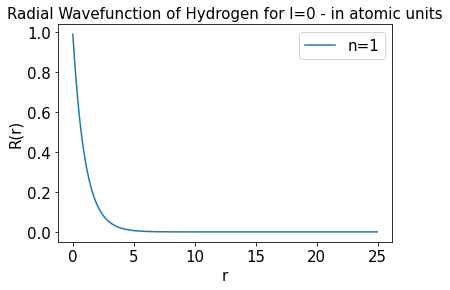

In [38]:
polynomial_degree = 100
r_data = np.arange(0.01, 25, 0.05)
num_data_points = len(r_data)
n = 1
l = 0
hydrogen = lrh.Hydrogen(azimuthal_number=l, principal_number=n)
R_matrix = lrh.create_R_matrix(num_data_points, polynomial_degree, r_data)
T_matrix = lrh.create_T_matrix(num_data_points, polynomial_degree, r_data)
coefficients = np.zeros(polynomial_degree)
for i in range(1, polynomial_degree):
    coefficients[i] = (-1)**(i-1)*(1/math.factorial(i-1))
u_pred = np.matmul(R_matrix, coefficients)
alpha = 10**-280
max_iterations = 500
max_cost = 10
coefficients, cost = lrh.gradient_descent(coefficients, alpha, max_cost, max_iterations, lrh.cost_function,
                                    lrh.cost_function_deriv, u_pred, r_data, R_matrix, T_matrix,
                                    hydrogen)
print(cost)
plt.plot(r_data, u_pred/r_data, label=f"n={n}")
plt.xlabel("r")
plt.ylabel("R(r)")
plt.title(f"Radial Wavefunction of Hydrogen for l={l} - in atomic units")
plt.legend(prop={"size":15})
plt.show()